# Get data

In [ ]:
!pip uninstall opencv-python -y
# downgrade OpenCV a bit since some none-free features are not avilable
!pip install opencv-contrib-python==3.4.2.17

Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6 MB 1.2 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains 'flow_files_anon002.zip'"}).GetList()
for flow_file in listed:
  print('title {}, id {}'.format(flow_file['title'], flow_file['id']))

listed = drive.ListFile({'q': "title contains 'masks.zip'"}).GetList()
for mask_file in listed:
  print('title {}, id {}'.format(mask_file['title'], mask_file['id']))

listed = drive.ListFile({'q': "title contains 'anon002.zip'"}).GetList()
for video_file in listed:
  print('title {}, id {}'.format(video_file['title'], video_file['id']))

# scripts
listed = drive.ListFile({'q': "title contains 'scripts.zip'"}).GetList()
for scripts in listed:
  print('title {}, id {}'.format(scripts['title'], scripts['id']))

title flow_files_anon002.zip, id 1Xtf3a2LfouLcPwyKMsJQRnYvCNZiJUa7
title masks.zip, id 1lBgLfSBD_8d0PxBSEI9uP7W3o-8bnZzW
title anon002.zip, id 1gc1LHkTElF1BNB5OfRjOczuvJHEAqWG8
title scripts.zip, id 1OIq_gEix1MsdlMD7_t7-9-dzg_5qgKNC


In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


file_id = flow_file['id']

fname = os.path.join('/content', 'flow_files.zip')
print('downloading to {}'.format(fname))
f_ = drive.CreateFile({'id': file_id})
f_.GetContentFile(fname)

file_id = mask_file['id']

fname = os.path.join('/content', 'masks.zip')
print('downloading to {}'.format(fname))
f_ = drive.CreateFile({'id': file_id})
f_.GetContentFile(fname)


file_id = video_file['id']

fname = os.path.join('/content', 'video.zip')
print('downloading to {}'.format(fname))
f_ = drive.CreateFile({'id': file_id})
f_.GetContentFile(fname)


file_id = scripts['id']

fname = os.path.join('/content', 'scripts.zip')
print('downloading to {}'.format(fname))
f_ = drive.CreateFile({'id': file_id})
f_.GetContentFile(fname)

downloading to /content/flow_files.zip
downloading to /content/masks.zip
downloading to /content/video.zip
downloading to /content/scripts.zip


In [ ]:
!unzip flow_files.zip
!unzip masks.zip
!unzip video.zip
!unzip scripts.zip

Archive:  flow_files.zip
   creating: flow_files_anon002/
  inflating: flow_files_anon002/000000.flo  
  inflating: flow_files_anon002/000001.flo  
  inflating: flow_files_anon002/000002.flo  
  inflating: flow_files_anon002/000003.flo  
  inflating: flow_files_anon002/000004.flo  
  inflating: flow_files_anon002/000005.flo  
  inflating: flow_files_anon002/000006.flo  
  inflating: flow_files_anon002/000007.flo  
  inflating: flow_files_anon002/000008.flo  
  inflating: flow_files_anon002/000009.flo  
  inflating: flow_files_anon002/000010.flo  
  inflating: flow_files_anon002/000011.flo  
  inflating: flow_files_anon002/000012.flo  
  inflating: flow_files_anon002/000013.flo  
  inflating: flow_files_anon002/000014.flo  
  inflating: flow_files_anon002/000015.flo  
  inflating: flow_files_anon002/000016.flo  
  inflating: flow_files_anon002/000017.flo  
  inflating: flow_files_anon002/000018.flo  
  inflating: flow_files_anon002/000019.flo  
  inflating: flow_files_anon002/000020.flo

# Get H_array

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
cv2.ocl.setUseOpenCL(False)
import sys
from PIL import Image
from pathlib import Path
from os import listdir
from scipy import optimize
import os
import shutil

%load_ext autoreload
%autoreload 2

In [ ]:
import scripts.flow_file_processing as fp
import scripts.registration_processing as rp
import scripts.visualize as vis
import scripts.transformation_processing as tp
import scripts.ssim_processing as sp
import scripts.utility_processing as up
import scripts.config_project as config_project

In [ ]:
IMG_SHAPE_STANDARD = (448,448);
seq_name = "anon002"
frames_path = "/content/" + seq_name
fullImgDirPath = "/content/" + seq_name
flowFileDirPath = "/content/flow_files_" + seq_name + "/"
transformation = "Affine"
mask_path = '/content/masks/' + seq_name + '_mask.png'
padding_size = 2500
is_exact = False
showImages = False
threshold = 7

if is_exact:
  seq_config = config_project.seq_exact
else:
  seq_config = config_project.seq_extra

In [ ]:
up.resize_all_images(fullImgDirPath, fullImgDirPath, IMG_SHAPE_STANDARD)

In [ ]:
flowPaths =  [ flowFileDirPath + '/' + f  for f  in sorted(listdir(flowFileDirPath))]
fullImgPaths =  [ fullImgDirPath + '/' + f  for f  in sorted(listdir(fullImgDirPath))]

In [ ]:
# confirm resize
a = cv2.imread(fullImgPaths[0])
a.shape

(448, 448, 3)

In [ ]:
v_crop_top = seq_config[seq_name]["v_crop_top"]
v_crop_bottom = seq_config[seq_name]["v_crop_bottom"]

mask_im = fp.get_mask_im(fullImgPaths, mask_path, v_crop_top, v_crop_bottom)

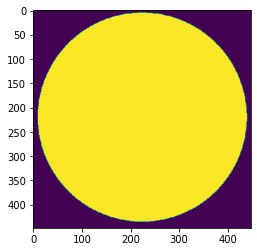

In [ ]:
vis.visualizeImg(mask_im)

In [ ]:
fullImgPaths = config_project.get_img_paths(fullImgPaths, seq_name, is_exact)
flowPaths = config_project.get_img_paths(flowPaths, seq_name, is_exact)

In [ ]:
fullImgPaths[0]

'/content/anon002/anon002_01751.png'

In [ ]:
seq_length = seq_config[seq_name]["file_length"] 
seq_length

300

In [ ]:
len(fullImgPaths)

300

In [ ]:
len(flowPaths)

300

### Get H

In [ ]:
padding = padding_size
threshold = 7
if transformation == "Homography":
  H_array = np.zeros((seq_length, 3,3 ))
elif transformation == "Affine":    
  H_array = np.zeros((seq_length, 2,3 ))
showImages = False

In [ ]:
for i in range(seq_length): #
  if i == 0:
    H_array[i] = np.concatenate([np.eye(2), np.array([[0],[0]])] ,axis=1)
  else:
    destImgPath = fullImgPaths[i-1] #the previous image
    srcImgPath =  fullImgPaths[i];
    flowPath = flowPaths[i-1]

    srcImg, destImg = fp.inputAndVisualizeStitchPair(srcImgPath, destImgPath, showImages)
    flow = fp.inputAndFormatFlowfile(flowPath)
    I, J = fp.getCameraPixels(destImg, mask_im)
    # middle image -> image
    ptsA, ptsB = fp.pointCorrespondenceFromOpticalFlow(flow, 0 ,I, J)
    H, status = fp.findTransformation(ptsA, ptsB,transformation, threshold)
    H_array[i] = H

tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 

In [ ]:
H_array.shape

(300, 2, 3)

In [ ]:
print(H_array[0])

[[1. 0. 0.]
 [0. 1. 0.]]


# Global registration Optimization


Get common features

In [ ]:
mask_im_contours = mask_im
image, contours, hierarchy = cv2.findContours(mask_im_contours,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
contours = np.array(contours)[0]
print(contours.shape)

1
(621, 1, 2)


In [ ]:
# showImages = False
# flowShape = flow.shape

## Perform optimization

Perform Optimization

debug optimization

1.   Check cost function - looks okay
2.   Check jacobian - looks okay
3.   Get cost function value before start 
4.   Get cost function value at the end

Optimization is fine, it just would not work as the correspondences between images are not entirely correct for using reprojection error

I am going to try a dense method that uses intensity based method now and see how that works


In [ ]:
# destImgPath = fullImgPaths[18] #the previous image
# srcImgPath =  fullImgPaths[19];
# flowPath = flowPaths[18]

# srcImg, destImg = fp.inputAndVisualizeStitchPair(srcImgPath, destImgPath, False)
# flow = fp.inputAndFormatFlowfile(flowPath)
# I, J = fp.getCameraPixels(destImg, mask_im)

# ptsA, ptsB = fp.pointCorrespondenceFromOpticalFlow(flow, 0 ,I, J)

In [ ]:
# len(H_array)

In [ ]:
def fun_LM_affine(h, x, x_ref):
    """
    Function to pass to OptimizeFunction
    :param h: Vector to be optimized
    :param x: physical coordinates - ndarray of rows of [x1, y1] such that x_ref(in homoogenous crd) = H * x(in homoogenous crd)
    :param x_ref: physical cooordinates - ndarray of rows of x1 y1
    :return:
    """
    r = x_ref.shape[0]
    H = np.reshape(h, (2,3))

    x_tild =  np.vstack(( x.T ,np.ones(r) )) 
    x_tild = np.matmul(H, x_tild)
    x_tild = x_tild.T 

    residual = x_ref.flatten() - x_tild.flatten()  # [x`1, y`1,] - [ x`2, y`2] -> to be optimized by Least squares

    #truncated least squares. 

    return residual

In [ ]:
def jac_LM_Affine(h, x, x_ref):

    def jac_fun1(inp_x, inp_h):
        # h = [h11, h12, h13, h21, h22, h23]
        # x = [x1,y1]


        # computing deps/dh11 ....deps/dh33
        out = np.zeros_like(inp_h)
        out[0] = -1 * inp_x[0]  # deps/da11
        out[1] = -1 * inp_x[1]  #deps/da12
        out[2] = -1  # deps/b1
        
        return out

    def jac_fun2(inp_x, inp_h):
        # h = [h11, h12, h13, h21, h22, h23]
        # x = [x1,y1]

        # computing deps/dh11 ....deps/dh33
        out = np.zeros_like(inp_h)
        out[3] = -1 * inp_x[0]  # deps/dh21
        out[4] = -1 * inp_x[1]  # deps/dh22
        out[5] = -1  # deps/dh23

        return out

    jac_eps_1 = np.apply_along_axis(jac_fun1, 1, x, h)
    jac_eps_2 = np.apply_along_axis(jac_fun2, 1, x, h)

    jac_out = np.empty((jac_eps_1.shape[0] + jac_eps_2.shape[0], jac_eps_1.shape[1]))
    jac_out[0::2] = jac_eps_1
    jac_out[1::2] = jac_eps_2

    return jac_out

In [ ]:
# !pip install lmfit

In [ ]:
# import lmfit

#### Test cost and residual

In [ ]:
# destImgPath = fullImgPaths[18] #the previous image
# srcImgPath =  fullImgPaths[19];
# flowPath = flowPaths[18]

# srcImg, destImg = fp.inputAndVisualizeStitchPair(srcImgPath, destImgPath, showImages)
# flow = fp.inputAndFormatFlowfile(flowPath)
# I, J = fp.getCameraPixels(destImg, mask_im)

# x_ref, x_inp = fp.pointCorrespondenceFromOpticalFlow(flow, 0 ,I, J) 
# #x_ref: destImg, x_inp: srcImg

# H_noise = np.random.randn(2, 3)

# # sol = optimize.least_squares(fun_LM_affine, H_noise.flatten(), args=(x_inp, x_ref), method='lm',
# #                               jac=jac_LM_Affine)

# sol = optimize.least_squares(fun_LM_affine, H_noise.flatten(), loss='soft_l1', args=(x_inp, x_ref), f_scale=0.1,
#                               jac=jac_LM_Affine)

# residual_before = fun_LM_affine(H_noise.flatten(), x_inp, x_ref)
# cost_before = 0.5 * np.sum(residual_before**2)

# cost_after = sol.cost

# print('cost before is ', cost_before)
# print('cost after is ', cost_after)

# H_optimized = sol.x.reshape((2,3))

In [ ]:
# H_optimized

In [ ]:
# H_array[19]

In [ ]:
# residual = fun_affine_batch(H_optimized.flatten(), x_inp, x_ref, amount_of_images_per_optim)
# cost = np.sum(residual**2)
# cost
# cost = np.sum( np.square(residual_before))
# 0.5 *cost

In [ ]:
new_H_array = np.zeros_like(H_array)
print(new_H_array.shape)

(300, 2, 3)


In [ ]:
def performOptimization():
  for i in range(seq_length): #
    if i == 0:
      new_H_array[i] = np.concatenate([np.eye(2), np.array([[0],[0]])] ,axis=1)
    else:
      destImgPath = fullImgPaths[i-1] #the previous image
      srcImgPath =  fullImgPaths[i];
      flowPath = flowPaths[i-1]

      srcImg, destImg = fp.inputAndVisualizeStitchPair(srcImgPath, destImgPath, showImages)
      flow = fp.inputAndFormatFlowfile(flowPath)
      I, J = fp.getCameraPixels(destImg, mask_im)
      
      # middle image -> image
      x_ref, x_inp = fp.pointCorrespondenceFromOpticalFlow(flow, 0 ,I, J)
      H_noise = np.random.randn(2, 3)

      sol = optimize.least_squares(fun_LM_affine, H_noise.flatten(), loss='soft_l1', args=(x_inp, x_ref),
                              jac=jac_LM_Affine)
      
      residual_before = fun_LM_affine(H_noise.flatten(), x_inp, x_ref)
      cost_before = 0.5 * np.sum(residual_before**2)
      cost_after = sol.cost

      H_optimized = sol.x.reshape((2,3))

      new_H_array[i] = H_optimized


performOptimization()

tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 448 height 448
(448, 448, 2)
tag 202021.25 width 

In [ ]:
print(new_H_array[24:27])
print(H_array[24:27])

[[[ 9.89241705e-01  4.31321269e-03  1.09799098e+00]
  [-4.28258263e-02  9.50559167e-01  3.54975487e+01]]

 [[ 9.94372144e-01 -3.83228749e-03  2.30695806e+00]
  [-2.34823361e-02  9.75239369e-01  2.82763696e+01]]

 [[ 9.91719625e-01 -4.21405247e-03  4.42370807e+00]
  [-2.40420396e-02  9.71079330e-01  3.20085064e+01]]]
[[[ 9.88998024e-01  3.89182041e-03  1.23802541e+00]
  [-4.15918449e-02  9.49575186e-01  3.52916174e+01]]

 [[ 9.94219901e-01 -3.92266017e-03  2.38397634e+00]
  [-2.28866768e-02  9.74161056e-01  2.81372094e+01]]

 [[ 9.92127593e-01 -4.22507908e-03  4.21334180e+00]
  [-2.34161728e-02  9.70294561e-01  3.18799999e+01]]]


## H_GLOBAL

SAve new_H_array


In [ ]:
with open(f'new_H_array_{seq_name}.npy', 'wb') as f:
    np.save(f, new_H_array)

In [ ]:
### Select a value that is close to the middle, but divisible by 3 
middle_num = len(fullImgPaths)//2
middle_num = middle_num
middle_num

150

In [ ]:
print(new_H_array[0])
print(new_H_array[middle_num])

[[1. 0. 0.]
 [0. 1. 0.]]
[[ 9.98805979e-01 -7.67106751e-04  7.12659472e-01]
 [-2.50373089e-04  9.99629003e-01 -4.14962444e-02]]


In [ ]:
H_global = rp.getHGlobal(new_H_array, fullImgPaths, middle_num)

In [ ]:
H_global[middle_num]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
H_global.shape

(300, 3, 3)

In [ ]:
!mkdir globalRegistrationTransparent

In [ ]:
def globalRegistration(img, imageName, index, padding, mask_im):
    ht, wd, cc= img.shape

    ww = wd + (2*padding)
    hh = ht + (2*padding)

    xx = (ww - wd) // 2
    yy = (hh - ht) // 2

    color = (0,0,0)

    img = cv2.bitwise_and(img, img, mask=mask_im)
    
    # vis.visualizeImg(img)

    T = np.copy(H_global[index])

    T[:2, 2] = T[:2, 2] + [xx , yy] 
    # print(T)

    result = cv2.warpPerspective(img, T, (ww, hh))

    # vis.visualizeImg(result)

    return result

In [ ]:
def do_global_registration(fullImgPaths, middle_num):
    for i in range(len(fullImgPaths)):
        imgPath = fullImgPaths[i];
        img = cv2.imread(imgPath)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
        imageName = Path(fullImgPaths[i]).name

        src = globalRegistration(img, imageName, i, padding_size, mask_im)
        rp.getTransparentImg(src, imageName)

In [ ]:
do_global_registration(fullImgPaths, middle_num)

In [ ]:
!zip -r /content/globalRegistration.zip /content/globalRegistrationTransparent

In [4]:
s = [2]

import numpy as np

def z(a):
  a.append(3)
  print(a)

z(s)
print(s)

[2, 3]
[2, 3]
